In [5]:
%pylab inline
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 

rcParams['figure.figsize'] = (8.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def plotROCCurve(y_test, prediction_prob):
    fpr, tpr, thresholds = roc_curve(y_test, prediction_prob[:,1])
    roc_auc = auc(fpr, tpr)
    plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plot([0, 1], [0, 1], 'k--')
    xlabel('False Positive Rate')
    ylabel('True Positive Rate')
    plt.legend(bbox_to_anchor=(0.9, 0.2),
               bbox_transform=plt.gcf().transFigure)
    savefig('logistic_regression_aucroc.png', bbox_inches='tight', dpi=150)

In [3]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [6]:
X_train, X_test, y_train, y_test = \
    cross_validation.train_test_split(X_df, outcomes_df['Outcome'].values, \
                                      test_size=0.25, random_state=2) # was 0

In [7]:
C = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e2, 1e3, 1e4]
param_grid = {'penalty':['l1', 'l2'], 'C': C}

In [8]:
logistic_regressions = grid_search.GridSearchCV(LogisticRegression(class_weight='auto'), cv=5, 
                                                param_grid=param_grid, scoring='roc_auc', 
                                                n_jobs=-1, verbose=1)

In [9]:
logistic_regressions.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 jobs       | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  66 out of  80 | elapsed:   17.2s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   20.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 100.0, 1000.0, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None,
       scoring='roc_auc', verbose=1)

In [10]:
for score in logistic_regressions.grid_scores_:
    print score

mean: 0.75760, std: 0.00347, params: {'penalty': 'l1', 'C': 0.0001}
mean: 0.76241, std: 0.00365, params: {'penalty': 'l2', 'C': 0.0001}
mean: 0.77224, std: 0.00327, params: {'penalty': 'l1', 'C': 0.001}
mean: 0.76243, std: 0.00381, params: {'penalty': 'l2', 'C': 0.001}
mean: 0.79056, std: 0.00225, params: {'penalty': 'l1', 'C': 0.01}
mean: 0.76194, std: 0.00367, params: {'penalty': 'l2', 'C': 0.01}
mean: 0.79067, std: 0.00232, params: {'penalty': 'l1', 'C': 0.1}
mean: 0.76250, std: 0.00298, params: {'penalty': 'l2', 'C': 0.1}
mean: 0.79052, std: 0.00237, params: {'penalty': 'l1', 'C': 1}
mean: 0.76225, std: 0.00297, params: {'penalty': 'l2', 'C': 1}
mean: 0.79053, std: 0.00237, params: {'penalty': 'l1', 'C': 100.0}
mean: 0.76143, std: 0.00382, params: {'penalty': 'l2', 'C': 100.0}
mean: 0.79051, std: 0.00235, params: {'penalty': 'l1', 'C': 1000.0}
mean: 0.76182, std: 0.00282, params: {'penalty': 'l2', 'C': 1000.0}
mean: 0.79050, std: 0.00236, params: {'penalty': 'l1', 'C': 10000.0}
mea

In [11]:
logistic_regressions.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [12]:
logistic_regressions.best_score_

0.79067092980674447

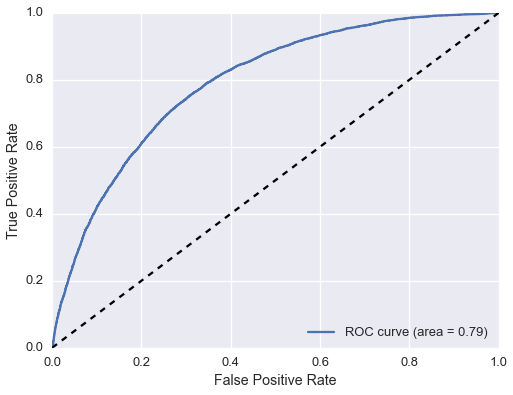

In [13]:
plotROCCurve(y_test, logistic_regressions.predict_proba(X_test))

In [20]:
y_1 = logistic_regressions.predict(X_test)
y_1_proba = logistic_regressions.predict_proba(X_test)

In [21]:
print y_1

[0 1 0 ..., 1 0 1]


In [22]:
metrics.accuracy_score(y_test,y_1, normalize=True)

0.71898329803118166

In [23]:
print metrics.classification_report(y_test, y_1)

             precision    recall  f1-score   support

          0       0.79      0.71      0.75     16892
          1       0.64      0.74      0.68     11907

avg / total       0.73      0.72      0.72     28799



In [25]:
from plot_suggestions import *
%load_ext autoreload
%autoreload 2

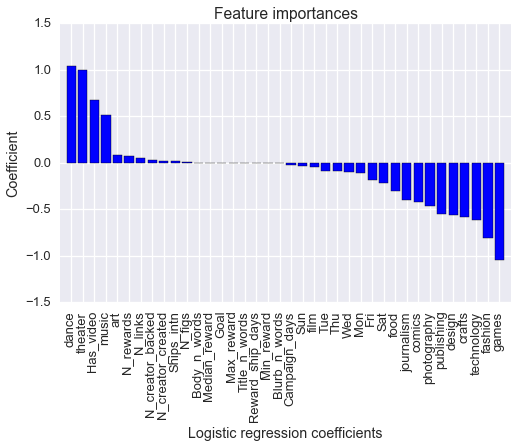

In [33]:
coefs = logistic_regressions.best_estimator_.coef_[0]
plot_coefficients(coefs,X_df.columns,len(coefs))